# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

620
['divnomorskoye', 'atuona', 'bone', 'punta arenas', 'albany', 'ilulissat', 'yichang', 'katsuura', 'sentyabrskiy', 'erenhot', 'carolina', 'castro', 'taolanaro', 'dikson', 'kaputa', 'qaanaaq', 'jamestown', 'flinders', 'hobart', 'kombissiri', 'hithadhoo', 'cherskiy', 'east london', 'plettenberg bay', 'busselton', 'jaisinghnagar', 'mareeba', 'cape town', 'vaini', 'yambio', 'bethlehem', 'nikel', 'puerto ayora', 'chuy', 'rikitea', 'ribeira grande', 'daoukro', 'dolbeau', 'carutapera', 'urengoy', 'meulaboh', 'ambilobe', 'turukhansk', 'hermanus', 'mentougou', 'butaritari', 'mataura', 'tiksi', 'namatanai', 'namie', 'vargem grande', 'port alfred', 'isangel', 'winslow', 'upernavik', 'khasan', 'khatanga', 'illoqqortoormiut', 'port elizabeth', 'coquimbo', 'hilo', 'tabiauea', 'dovbysh', 'belushya guba', 'mahebourg', 'yellowknife', 'diu', 'plouzane', 'carnarvon', 'bethel', 'faya', 'bubaque', 'santa cruz', 'athabasca', 'yumen', 'bluff', 'pevek', 'mar del plata', 'sitka', 'prince rupert', 'inhambane

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for the API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Units to return (imperial=fahrenheit)
units = "imperial"

# Create the query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [29]:
# Create empty lists to hold the information collected from the API
name = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set starting count for the file record
file = 1

# For loop to cycle through each city on the list and add the data to the empty lists
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_file = response["name"]
        print(f"Processing Record {file} | {city_file}")

        # Advance the counter by one after each city
        file = file + 1
    
    # Not all cities are in the API - for any that are not found, skip and move to the next
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    continue

Processing Record 1 | Divnomorskoye
Processing Record 2 | Atuona
Processing Record 3 | Bone
Processing Record 4 | Punta Arenas
Processing Record 5 | Albany
Processing Record 6 | Ilulissat
Processing Record 7 | Yichang
Processing Record 8 | Katsuura
City not found. Skipping...
Processing Record 9 | Erenhot
Processing Record 10 | Carolina
Processing Record 11 | Castro
City not found. Skipping...
Processing Record 12 | Dikson
Processing Record 13 | Kaputa
Processing Record 14 | Qaanaaq
Processing Record 15 | Jamestown
Processing Record 16 | Flinders
Processing Record 17 | Hobart
Processing Record 18 | Kombissiri
Processing Record 19 | Hithadhoo
Processing Record 20 | Cherskiy
Processing Record 21 | East London
Processing Record 22 | Plettenberg Bay
Processing Record 23 | Busselton
Processing Record 24 | Jaisinghnagar
Processing Record 25 | Mareeba
Processing Record 26 | Cape Town
Processing Record 27 | Vaini
City not found. Skipping...
Processing Record 28 | Bethlehem
Processing Record 29

Processing Record 230 | Stonewall
Processing Record 231 | Vao
Processing Record 232 | Port Lincoln
Processing Record 233 | Ulaangom
Processing Record 234 | Ballina
City not found. Skipping...
Processing Record 235 | Catalina Foothills
City not found. Skipping...
Processing Record 236 | Arlit
City not found. Skipping...
Processing Record 237 | Lagoa
Processing Record 238 | Zhigansk
City not found. Skipping...
Processing Record 239 | Quelimane
Processing Record 240 | Burnie
City not found. Skipping...
Processing Record 241 | Grand-Santi
City not found. Skipping...
Processing Record 242 | Mandera
Processing Record 243 | Champerico
Processing Record 244 | Dalby
Processing Record 245 | Rundu
Processing Record 246 | Rio Gallegos
Processing Record 247 | Sao Jose da Coroa Grande
City not found. Skipping...
Processing Record 248 | Tyulyachi
Processing Record 249 | Mildura
Processing Record 250 | Port Angeles
Processing Record 251 | Olyka
Processing Record 252 | Poya
Processing Record 253 | Sant

Processing Record 456 | Beringovskiy
Processing Record 457 | Usinsk
Processing Record 458 | Nioro
Processing Record 459 | Salina
Processing Record 460 | Katobu
Processing Record 461 | Tayu
Processing Record 462 | Tefe
Processing Record 463 | Hami
City not found. Skipping...
Processing Record 464 | Farafangana
Processing Record 465 | Zabol
Processing Record 466 | Floresti
Processing Record 467 | Katherine
City not found. Skipping...
Processing Record 468 | Tequila
Processing Record 469 | Mackenzie
City not found. Skipping...
Processing Record 470 | Mackay
Processing Record 471 | Ankang
Processing Record 472 | Siemiatycze
Processing Record 473 | Opuwo
Processing Record 474 | Mont-Dore
City not found. Skipping...
City not found. Skipping...
Processing Record 475 | Vangaindrano
City not found. Skipping...
Processing Record 476 | Pedernales
Processing Record 477 | Tomatlan
Processing Record 478 | Pangody
Processing Record 479 | Khash
Processing Record 480 | Alice Springs
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a dataframe from the lists
weather_data = {"City": name,
                "Country": country,
                "Date": date,
                "Latitude": lat,
                "Longitude": lon,
                "Temperature": temperature,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed
               }
weather_data_df = pd.DataFrame(weather_data)

# Count to ensure there are enough unique variables (over 500)
weather_data_df.count()

City           554
Country        554
Date           554
Latitude       554
Longitude      554
Temperature    554
Humidity       554
Cloudiness     554
Wind Speed     554
dtype: int64

In [20]:
# Create a CSV file from the dataframe
weather_data_df.to_csv('cities.csv')

# Print a sample of the dataframe
weather_data_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Divnomorskoye,RU,1563417292,44.50,38.13,71.87,63,62,16.17
1,Atuona,PF,1563417035,-9.80,-139.03,80.33,69,0,11.27
2,Bone,DE,1563417293,51.97,12.14,53.94,87,0,5.82
3,Punta Arenas,CL,1563417293,-53.16,-70.91,28.18,100,0,8.05
4,Albany,US,1563417043,42.65,-73.75,70.36,88,75,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

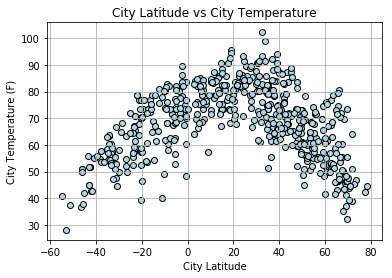

In [24]:
# Create the scatter plot
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Temperature"],
            marker="o",
            color="lightblue",
            edgecolor="black"
           )

plt.title("City Latitude vs City Temperature")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")
plt.grid()

plt.savefig("Temp_Lat.png")

plt.show()

#### Latitude vs. Humidity Plot

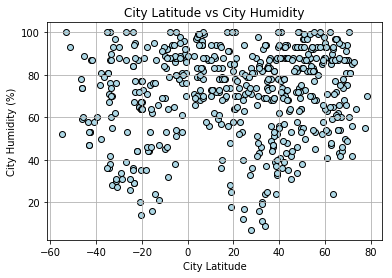

In [25]:
# Create the scatter plots for latitude v. humidity
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Humidity"],
            marker="o",
            color="lightblue",
            edgecolor="black"
           )

plt.title("City Latitude vs City Humidity")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity (%)")
plt.grid()

plt.savefig("Humid_Lat.png")

plt.show()

#### Latitude vs. Cloudiness Plot

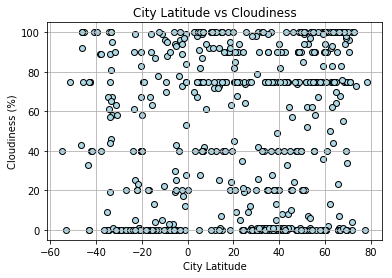

In [26]:
# Create the scatter plot for latitude v. cloudiness
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Cloudiness"],
            marker="o",
            color="lightblue",
            edgecolor="black"
           )

plt.title("City Latitude vs Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("Cloud_Lat.png")

plt.show()

#### Latitude vs. Wind Speed Plot

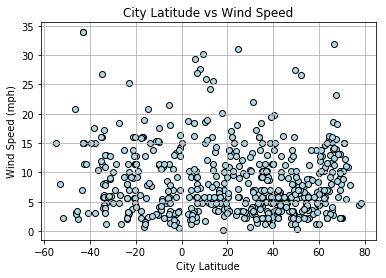

In [27]:
# Create a scatter plot for latitude v wind speed
plt.scatter(weather_data_df["Latitude"],
            weather_data_df["Wind Speed"],
            marker="o",
            color="lightblue",
            edgecolor="black"
           )

plt.title("City Latitude vs Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Wind_Lat.png")

plt.show()